## **Notebook PC#01**
## Regularized Linear Classifier for the MNIST database. Designed from scratch.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Beatriz Akiria de Assis Quaresma - 203899 <br>
**Aluno(a):** Decio Miranda Filho - 236087


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from keras.datasets import mnist

(Xp, y), (Xtp, yt) = mnist.load_data()
Xa = Xp.reshape(Xp.shape[0], 784)
Xta = Xtp.reshape(Xtp.shape[0], 784)

Xa = Xa / 255.0
Xta = Xta / 255.0

X0 = np.ones((Xp.shape[0],1))
X = np.hstack((X0,Xa))
Xt0 = np.ones((Xtp.shape[0],1))
Xt = np.hstack((Xt0,Xta))

print("Shape of X: ".ljust(10),  X.shape)
print("Shape of y: ".ljust(10),  y.shape)
print("Shape of Xt: ".ljust(10),  X.shape)
print("Shape of yt: ".ljust(10),  yt.shape)

Shape of X:  (60000, 785)
Shape of y:  (60000,)
Shape of Xt:  (60000, 785)
Shape of yt:  (10000,)


In [ ]:
# Visualizing a random data point
import plotly.express as px

ind = np.random.randint(6000)
print('Data point: ', ind, '\n', 'Label: ', y[ind])
fig = px.imshow(255-Xp[ind], binary_string=True, width=200, height=200)
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.update_layout(margin=dict(l=1, r=1, t=1, b=1))
fig.show()

Data point:  3235 
 Label:  4


In [ ]:
# Dataset balancing analysis
from tensorflow.keras.utils import to_categorical

yy = to_categorical(y)
yyt = to_categorical(yt)
sum_along_columns1 = np.sum(yy, axis = 0)
print(sum_along_columns1)
sum_along_columns2 = np.sum(yyt, axis = 0)
print(sum_along_columns2)
fig1 = px.bar(x=range(10),y=sum_along_columns1, width=600, height=400,
              labels=dict(x="Class", y="Number of examples"), title="<b>Number of examples per class in the training dataset</b>")
fig1.update_layout(xaxis = dict(tickmode = 'linear', dtick = 1), title_x=0.5)
fig1.show()
fig2 = px.bar(x=range(10),y=sum_along_columns2, width=600, height=400,
              labels=dict(x="Class", y="Number of examples"), title="<b>Number of examples per class in the test dataset</b>")
fig2.update_layout(xaxis = dict(tickmode = 'linear', dtick = 1), title_x=0.5)
fig2.show()

[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]
[ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]


In [ ]:
partition = 0.7

# Mixing the dataset before partitioning
index = np.arange(0,X.shape[0])
np.random.shuffle(index)

training_set_size = int(X.shape[0] * partition)

index_training = index[:training_set_size]
index_validation = index[training_set_size:]


X_training = X[index_training]
y_training = yy[index_training]

X_validation = X[index_validation]
y_validation = yy[index_validation]

print("X_training:".ljust(20), X_training.shape)
print("y_training:".ljust(20), y_training.shape)

print("X_validation:".ljust(20), X_validation.shape)
print("y_validation:".ljust(20), y_validation.shape)

X_training:          (42000, 785)
y_training:          (42000, 10)
X_validation:        (18000, 785)
y_validation:        (18000, 10)


In [ ]:
def get_class_from_sample(sample: np.ndarray):
    class_ = 1
    for i in sample:
        if i == 0:
            class_ += 1
        else:
            break
    return class_

In [ ]:
def get_w(X, y, c):
    w_1 = (np.matmul(np.transpose(X), X) + c * np.eye(X.shape[1])) # Adiciona o termo de regularização Ridge indiretamente
    w_2 = np.matmul(np.transpose(X), y) # X`Y
    w,resid,rank,s = np.linalg.lstsq(w_1, w_2, rcond=None) # w_1 é a matriz de dados A e w_2 é b (Ax=b) e x são os pesos as serem estimados
    return w

In [ ]:
def get_rates_from_c_values(X, y, c_values, Ws = []):
    hit_rates = []

    if len(Ws) != 0:
        are_Ws_given = True
    else:
        are_Ws_given = False
        Ws = []

    for index, c in enumerate(c_values):
        print(c)

        if are_Ws_given:
            W = Ws[index]
        else:
            W = get_w(X, y, c)
            Ws.append(W)

        y_estimate = np.matmul(X,W)
        hits = 0
        for index, estimate in enumerate(y_estimate):
            max_index = np.where(estimate == np.amax(estimate))[0][0]
            estimated_class = max_index + 1
            if estimated_class == get_class_from_sample(y[index]):
                hits += 1
        hit_rates.append(hits/y_estimate.shape[0])
    return hit_rates, Ws

In [ ]:
c_values = [pow(2,d) for d in range(5, 13, 1)] # Range goes up to 19 to ensure search up to 2^18

hit_rates_training, Ws = get_rates_from_c_values(X_training, y_training, c_values)

32
64
128
256
512
1024
2048
4096


In [ ]:
hit_rates_validation, _ = get_rates_from_c_values(X_validation, y_validation, c_values, Ws)

32
64
128
256
512
1024
2048
4096


Best c value: 512 
Performance of this value: 0.8532777777777778


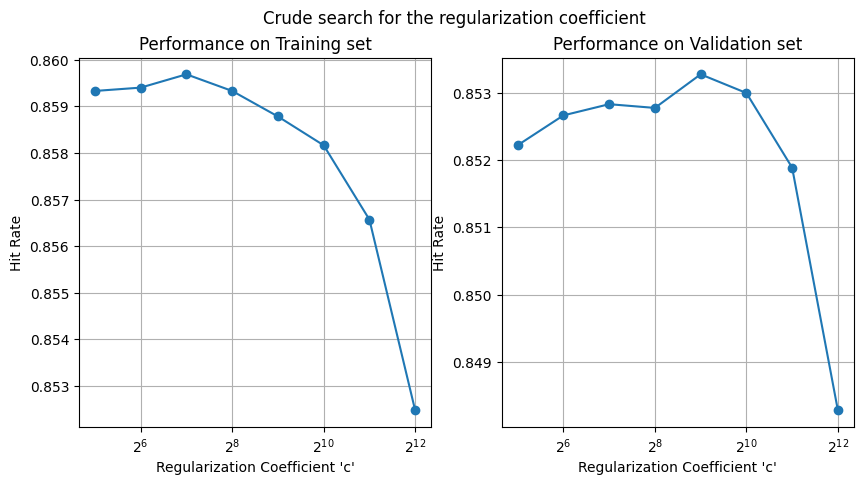

In [ ]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.suptitle("Crude search for the regularization coefficient")
axs[0].semilogx(c_values, hit_rates_training, 'o-', base=2)
axs[0].set_title("Performance on Training set")
axs[0].set_ylabel("Hit Rate")
axs[0].set_xlabel("Regularization Coefficient 'c'")
axs[0].grid()

axs[1].semilogx(c_values, hit_rates_validation, 'o-', base=2)
axs[1].set_title("Performance on Validation set")
axs[1].set_ylabel("Hit Rate")
axs[1].set_xlabel("Regularization Coefficient 'c'")
axs[1].grid()

best_c_index = np.where(hit_rates_validation == np.amax(hit_rates_validation))[0][0]

best_c = c_values[best_c_index]

print("Best c value: {} \nPerformance of this value: {}".format(best_c, hit_rates_validation[best_c_index]))



<font color="green">
Atividade (a) <br>
Confira se o intervalo de excursão da busca está adequado. Justifique sua resposta. <br>
Caso não esteja, faça modificações pertinentes até encontrar um bom intervalo de busca. <br>
</font>

**Resposta:**

O valor ideal de $c$ é aquele que minimiza o erro no conjunto de validação, ou ainda, que maximize a *performance* no conjunto de validação. Aumentando o intervalo de busca é possível definir que o melhor $c$ *value* continua o mesmo, sendo próximo de"*best_c value* = 1024", observamos um máximo local dentro do intervalo de busca. Nota-se que a taxa de acerto atinge o pico em $2^{10}$ e depois cai abruptamente.

Portanto, o intervalo de busca adotado cumpre o objetivo de identificar um máximo para o coeficiente de regularização, proporcionando uma visão ampla do desempenho nos conjuntos de treinamento e validação. No entanto, uma busca mais refinada, testando intervalos entre $2^5$ e $2^{12}$, resulta na mesma solução, porém com uma região de busca mais restrita, o que agiliza a obtenção dos resultados sem comprometer a precisão.

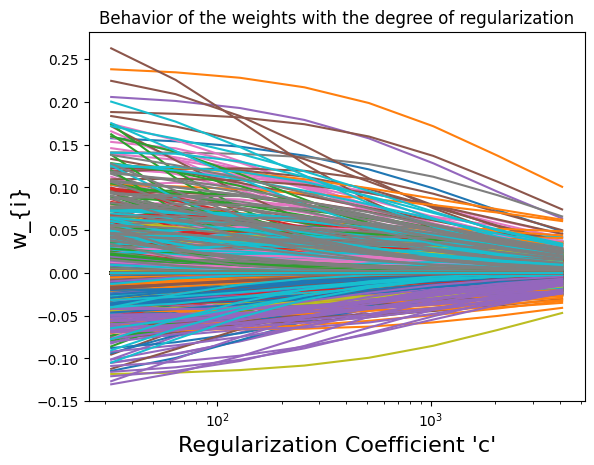

In [ ]:
lambd_values = c_values
w_values = Ws
import numpy as np
import matplotlib.pyplot as plt

def plot_regularization_path(lambd_values, w_values):
    num_coeffs = len(w_values[0])
    for i in range(num_coeffs):
        plt.plot(lambd_values, [wi[i] for wi in w_values])
    plt.xlabel(r"Regularization Coefficient 'c'", fontsize=16)
    plt.ylabel(r"w_{i}", fontsize=16)
    plt.xscale("log")
    plt.title("Behavior of the weights with the degree of regularization")
    plt.show()

plot_regularization_path(lambd_values, w_values)

In [ ]:
step =  0.1 * (4 * best_c - best_c / 4);

fine_c_values = np.arange((best_c/4), (4*best_c) + step / 10, step)

hit_rates_training_fine, Ws_fine = get_rates_from_c_values(X_training, y_training, fine_c_values)

128.0
320.0
512.0
704.0
896.0
1088.0
1280.0
1472.0
1664.0
1856.0
2048.0


In [ ]:
hit_rates_validation_fine, _ = get_rates_from_c_values(X_validation, y_validation, fine_c_values, Ws_fine)

128.0
320.0
512.0
704.0
896.0
1088.0
1280.0
1472.0
1664.0
1856.0
2048.0


Best c value: 512.0 
Performance of this value: 0.8532777777777778


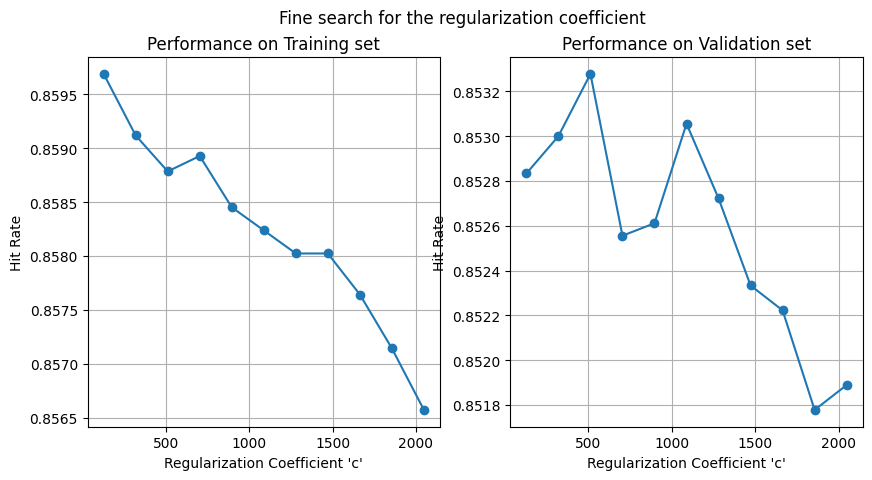

In [ ]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.suptitle("Fine search for the regularization coefficient")
axs[0].plot(fine_c_values, hit_rates_training_fine, 'o-')
axs[0].set_title("Performance on Training set")
axs[0].set_ylabel("Hit Rate")
axs[0].set_xlabel("Regularization Coefficient 'c'")
axs[0].grid()

axs[1].plot(fine_c_values, hit_rates_validation_fine, 'o-')
axs[1].set_title("Performance on Validation set")
axs[1].set_ylabel("Hit Rate")
axs[1].set_xlabel("Regularization Coefficient 'c'")
axs[1].grid()

best_c_index = np.where(hit_rates_validation_fine == np.amax(hit_rates_validation_fine))[0][0]

best_c = fine_c_values[best_c_index]

print("Best c value: {} \nPerformance of this value: {}".format(best_c, hit_rates_validation_fine[best_c_index]))

In [ ]:
W = get_w(X, yy, best_c)
print(W.shape)

(785, 10)


In [ ]:
yt_estimate = np.matmul(Xt,W)
hits = 0
confusion_matrix = np.zeros([10, 10], dtype=int)
for index, estimate in enumerate(yt_estimate):
    max_index = np.where(estimate == np.amax(estimate))[0][0]
    estimated_class = max_index + 1
    if estimated_class == get_class_from_sample(yyt[index,:]):
        hits += 1
        confusion_matrix[estimated_class-1][estimated_class-1] += 1
    else:
        confusion_matrix[estimated_class-1][get_class_from_sample(yyt[index,:])-1] += 1

print("Performance on test set: {}".format(hits/yt_estimate.shape[0]))
confusion_matrix_df = pd.DataFrame(confusion_matrix)
confusion_matrix_df

Performance on test set: 0.8642


,0,1,2,3,4,5,6,7,8,9
0,942,0,18,4,0,22,17,4,14,19
1,0,1106,60,17,22,15,10,44,53,11
2,1,2,828,25,6,4,7,16,10,2
3,2,2,21,886,0,85,0,7,31,13
4,1,2,15,5,882,24,17,20,26,73
5,9,1,0,14,2,643,16,0,31,0
6,15,5,32,10,10,23,885,1,17,1
7,2,1,21,23,1,18,0,893,14,67
8,7,16,34,16,11,40,6,0,761,7
9,1,0,3,10,48,18,0,43,17,816


In [ ]:
def balanced_accuracy(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    balanced_acc = 0
    for i in range(num_classes):
        true_positives = confusion_matrix[i, i]
        false_negatives = np.sum(confusion_matrix[i, :]) - true_positives
        balanced_acc += true_positives / (true_positives + false_negatives)
    return balanced_acc / num_classes

# Calcula a acurácia balanceada
balanced_acc = balanced_accuracy(confusion_matrix)
print("Balanced Accuracy:", balanced_acc)

Balanced Accuracy: 0.8669331012165744


In [ ]:
def f_score(confusion_matrix, betas):
    recall = confusion_matrix[range(10), range(10)]/np.sum(confusion_matrix, axis=0)
    precision = confusion_matrix[range(10), range(10)]/np.sum(confusion_matrix, axis=1)

    f_scores = np.zeros((len(betas), 10))

    for i, b in enumerate(betas):
        f_scores[i] = (1 + b**2) * precision * recall/(b**2 * precision + recall)

    return f_scores

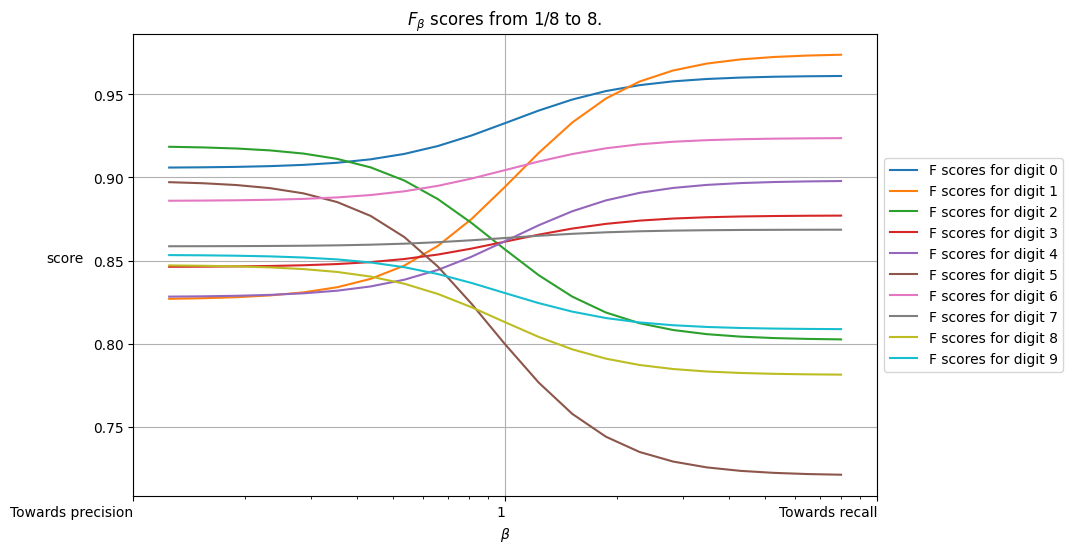

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

for i in range(10):
    plt.plot(np.logspace(-3, 3, base=2, num=21), f_score(confusion_matrix, np.logspace(-4, 4, base=2, num=21))[:, i], label=f"F scores for digit {i}")

ax.set_xlabel("$\\beta$")
ax.set_ylabel("score", rotation=0, labelpad=20)

ax.set_xscale('log')
ax.set_xticks(np.geomspace(10**-1, 10**1 ,3), ["Towards precision", "1","Towards recall"], ha='right')
ax.grid()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.get_xaxis

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_title("$F_{\\beta}$ scores from 1/8 to 8.")

plt.show()

<font color="green">
Atividade (b) <br>
Indique quais são as duas classes mais desafiadoras para o classificador e qual o critério usado por você para chegar a esta conclusão. <br>
</font>

**Resposta:**

 Podemos concluir que as classes mais desafiadoras foram a 5 e a 8. O critério utilizado foi observar o $F_\beta$-*score*.

 Sabemos que o $F_\beta$-*score* combina as informações de precisão, que indica a proporção de verdadeiros positivos em relação a todos os exemplos classificados como positivos pelo modelo, e *recall*, que indica a proporção de verdadeiros positivos em relação a todos os exemplos verdadeiramente positivos, através de uma média harmônica ponderada, onde $\beta$ é o fator de ponderação. Como a mesma importância é dada para a precisão e para o *recall* podemos considerar $\beta = 1$. Assim, ao analisar o $F_1$-*score* para cada classe, é possível identificar quais classes estão sendo classificadas com mais erros. Valores de $F_1$ próximos de 1 indicam que o classificador obteve bons resultados tanto na precisão quanto no *recall*, por outro lado, quanto menor for o $F_1$, mais erros de classificação estão ocorrendo para essa classe.


#### **Visualization of the 10 vectors of weights W, without the bias.**



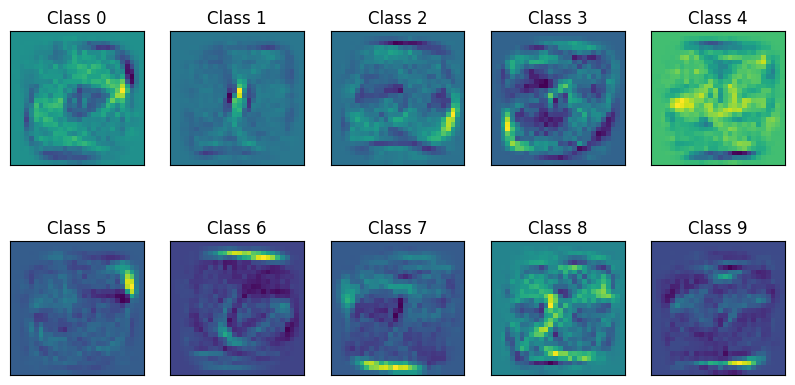

In [ ]:
# Only for the MNIST dataset
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = W[1:,i].reshape([28,28])
    plt.title(f'Class {i}')
    plt.imshow(weight, cmap='viridis')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

#### **To improve the visualization of the 10 vectors of weights W, the use of a divergent color map is indicated: the average value of the color map is a neutral color and the extreme values represent different colors. Using a divergent color map and a bilinear interpolation scheme (to facilitate the visualization of low-resolution images), the result of the visualization of the 10 vectors of weights W is illustrated in the following images.**

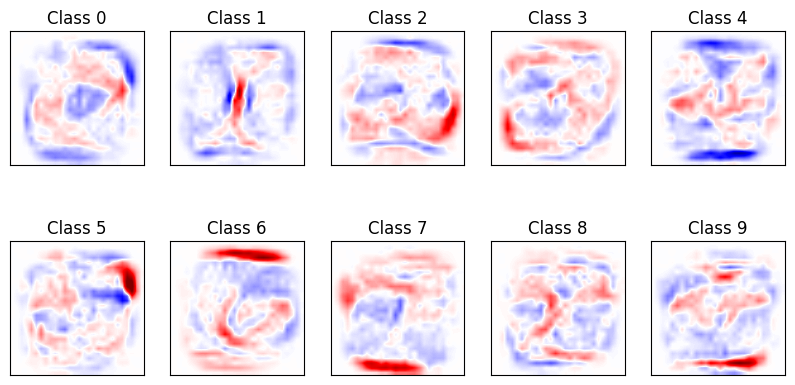

In [ ]:
# Only for the MNIST dataset
scale = np.abs(W).max()
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = W[1:,i].reshape([28,28])
    plt.title(f'Class {i}')
    plt.imshow(weight, cmap=plt.cm.seismic, vmin=-scale/2, vmax=scale/2, interpolation='bilinear')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

<font color="green">
Atividade (c) <br>
Com base nesses dois resultados visuais acima, responda: Qual é a estratégia adotada pelo classificador linear para buscar máximo desempenho? <br>
</font>

**Resposta:**

Com base nos resultados visuais apresentados, o classificador linear optou por uma abordagem onde atribui pesos negativos às bordas dos dígitos, pesos positivos às áreas prováveis dos dígitos e não faz interação em pontos muito distantes, onde o peso é próximo de $0$.

Essa abordagem parece lógica, pois ao desenhar qualquer número que não seja zero, ele terá características que o distinguem de um zero, uma vez que diminui a probabilidade de que a saída seja zero quando o número passa pelo centro.

#### **Performance of the average 10 vectors of weights (here no bias is considered)**

In [ ]:
W1 = np.zeros((784, 10))
for i in range(10):
  aux = np.mean(Xp[y==i], axis=0)
  aux = aux.reshape(784)/255
  aux = aux-np.mean(aux)
  W1[:,i] = aux/np.sqrt(np.sum(np.square(aux)))
yt_estimate = np.matmul(Xta,W1)
hits = 0
confusion_matrix = np.zeros([10, 10], dtype=int)
for index, estimate in enumerate(yt_estimate):
    max_index = np.where(estimate == np.amax(estimate))[0][0]
    estimated_class = max_index + 1
    if estimated_class == get_class_from_sample(yyt[index,:]):
        hits += 1
        confusion_matrix[estimated_class-1][estimated_class-1] += 1
    else:
        confusion_matrix[estimated_class-1][get_class_from_sample(yyt[index,:])-1] += 1

print("Performance on test set: {}".format(hits/yt_estimate.shape[0]))
confusion_matrix_df = pd.DataFrame(confusion_matrix)
confusion_matrix_df

Performance on test set: 0.8208


,0,1,2,3,4,5,6,7,8,9
0,902,0,27,6,4,27,29,8,7,16
1,0,1074,51,5,10,37,14,51,21,17
2,6,9,776,25,3,9,16,26,11,6
3,3,4,43,851,0,137,1,0,91,12
4,0,0,27,1,793,20,18,16,12,80
5,33,4,0,28,1,564,22,0,29,11
6,25,4,31,8,24,29,850,1,17,3
7,1,0,15,14,1,11,0,849,10,29
8,10,40,56,52,19,34,8,22,738,24
9,0,0,6,20,127,24,0,55,38,811


#### **Visualization of the average 10 vectors of weights**

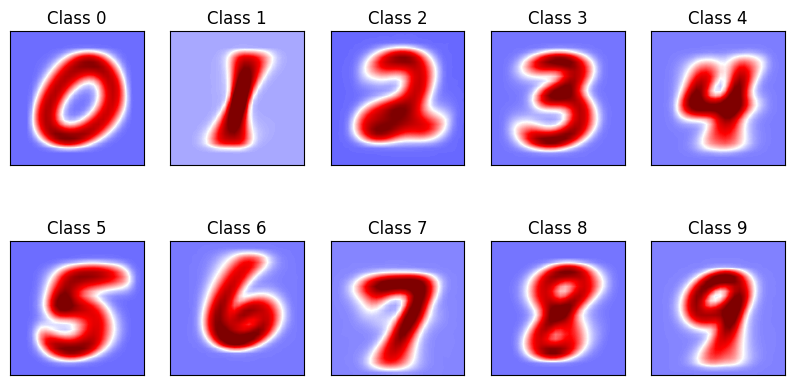

In [ ]:
# Only for the MNIST dataset
scale = np.abs(W1).max()
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = W1[:,i].reshape([28,28])
    plt.title(f'Class {i}')
    plt.imshow(weight, cmap=plt.cm.seismic, vmin=-scale/2, vmax=scale/2, interpolation='bilinear')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

<font color="green">
Atividade (d) <br>
Com base na execução das duas células acima, responda: Por que motivo os vetores com a média das imagens por classe não levam a um classificador de máximo desempenho? Nota: A resposta não depende do fato do classificador aqui não adotar o bias em sua implementação. <br>
</font>

**Resposta:**

A abordagem de utilizar apenas as médias por classe como características não leva a um classificador de máximo desempenho por duas razões principais.

Primeiro, as médias não representam toda a diversidade presente nos dados de cada classe, pois a média não compara as classes, visando identificar e ponderar aspectos mais discriminantes entre as classes, o que pode levar a uma perda de informações importantes para a tarefa de classificação. Uma vez que conjunto de dados MNIST consiste em imagens de dígitos escritos à mão de 0 a 9, cada dígito pode ter variações significativas em termos de estilo de escrita e orientação dentro da imagem. Portanto, depender apenas das médias por classe pode resultar em um classificador que não consegue generalizar bem para novas imagens e, portanto, não alcança um desempenho ideal.

Segundo, ao usar uma abordagem linear o classificador pode não conseguir lidar com a complexidade dos dados, especialmente quando as relações entre as características não são simplesmente lineares. Em resumo, essa abordagem linear pode comprometer a capacidade de generalização do classificador, resultando em um desempenho inferior.

Image no. 11


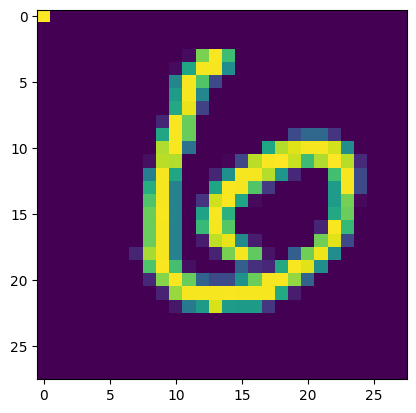

Real: 6
Predicted: 4
Rank of the correct answer: 6
Probabilities: [ 0.23688661  0.16227066  0.16125726  0.07150823  0.27643087 -0.18438176
  0.08364683 -0.06790115  0.17501239  0.05622092] 

Image no. 33


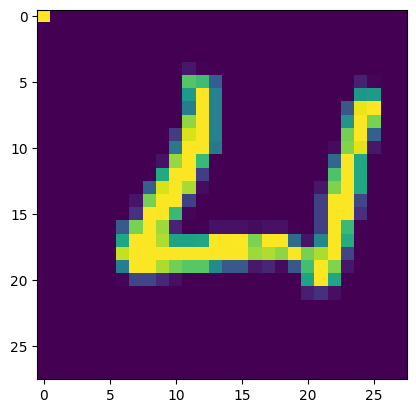

Real: 4
Predicted: 5
Rank of the correct answer: 4
Probabilities: [ 0.35910458 -0.07970437  0.18329918 -0.30726978  0.20696604  0.35922957
  0.22318755 -0.03617589  0.07264277 -0.0338498 ] 

Image no. 38


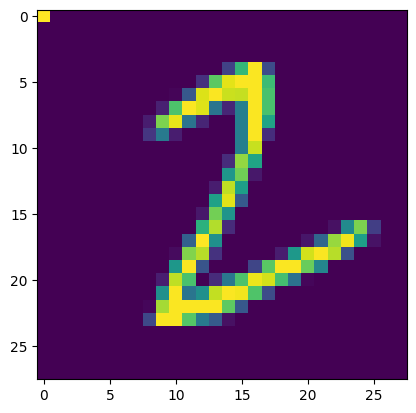

Real: 2
Predicted: 1
Rank of the correct answer: 5
Probabilities: [ 0.18020587  0.33409164  0.16395085  0.25931333 -0.27781457  0.08996929
  0.20470219 -0.04318261  0.12183062 -0.08424618] 

Image no. 43


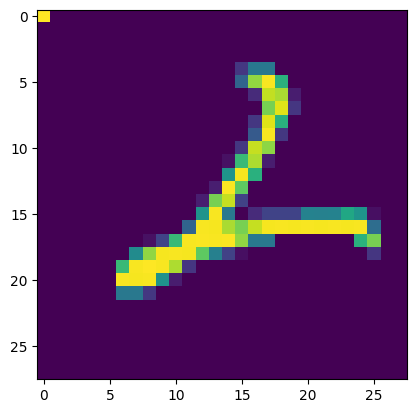

Real: 2
Predicted: 1
Rank of the correct answer: 2
Probabilities: [-0.03194203  0.34681098  0.27495089  0.05607913  0.20411365  0.05092195
 -0.01852653 -0.03184757  0.12391373 -0.035026  ] 

Image no. 45


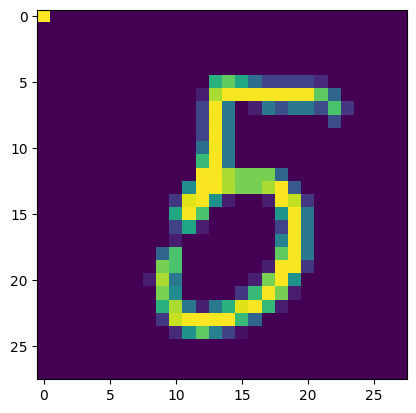

Real: 5
Predicted: 3
Rank of the correct answer: 2
Probabilities: [ 0.08952048 -0.11962644 -0.0576617   0.38070706  0.05552395  0.34439754
  0.17761721 -0.08937837  0.18007181 -0.00520164] 

Image no. 46


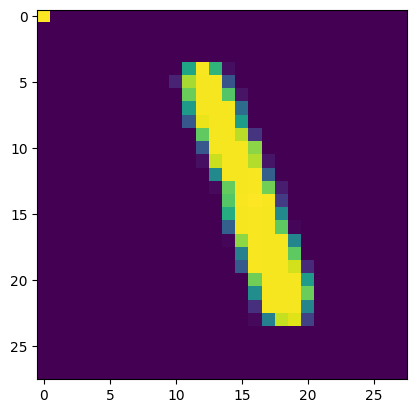

Real: 1
Predicted: 3
Rank of the correct answer: 2
Probabilities: [-0.28021156  0.31859752  0.14710044  0.34291621  0.0867147   0.19649567
  0.06487125  0.05242436 -0.00392484  0.06434346] 

Image no. 47


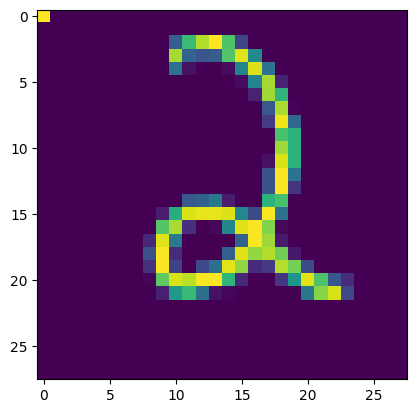

Real: 2
Predicted: 6
Rank of the correct answer: 2
Probabilities: [ 5.80037731e-03  2.07715294e-04  3.63993539e-01  2.76895939e-02
 -5.52533279e-04  1.03355515e-01  4.17871928e-01  6.53181891e-02
 -7.55685637e-02  4.97494290e-02] 

Image no. 63


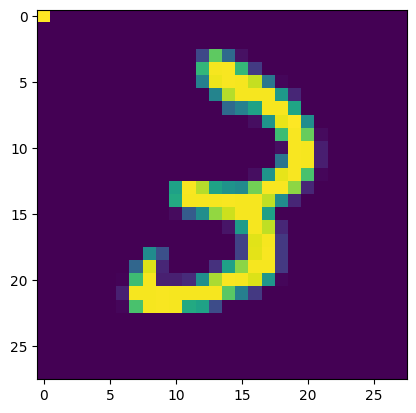

Real: 3
Predicted: 2
Rank of the correct answer: 3
Probabilities: [ 0.0595631   0.04759984  0.40723085  0.18463218  0.05503745 -0.0217809
 -0.04153246 -0.11309936  0.11645409  0.28132427] 

Image no. 66


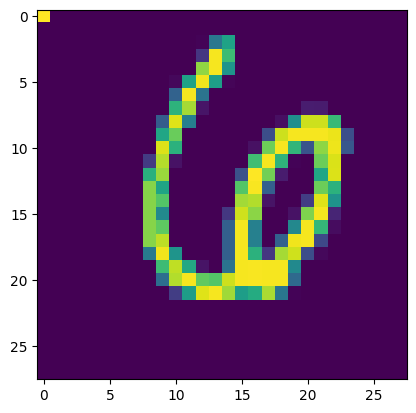

Real: 6
Predicted: 1
Rank of the correct answer: 4
Probabilities: [ 0.22516076  0.27545922  0.11849309  0.12786462  0.21799982 -0.09162204
  0.20504387  0.13418899 -0.08318284 -0.14710994] 

Image no. 80


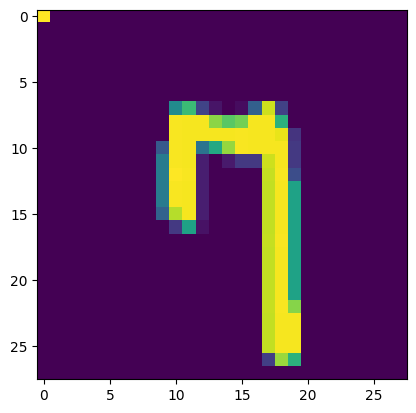

Real: 7
Predicted: 9
Rank of the correct answer: 2
Probabilities: [ 0.10616485 -0.13308094 -0.00539877  0.06345828  0.08231111  0.09584586
  0.00582353  0.44276499 -0.20027074  0.53640133] 

Image no. 92


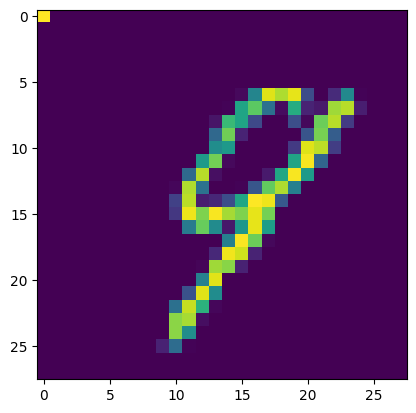

Real: 9
Predicted: 4
Rank of the correct answer: 2
Probabilities: [ 0.02484503  0.11125672  0.08510171 -0.02893844  0.26623576  0.06077207
  0.04107827  0.11440547  0.07626043  0.19093711] 

Image no. 97


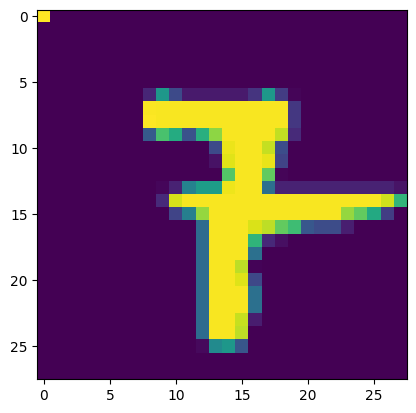

Real: 7
Predicted: 1
Rank of the correct answer: 2
Probabilities: [-0.12176029  0.41224832 -0.14684125  0.20680319  0.14450578  0.0066954
  0.21575968  0.36761351 -0.01870211 -0.01863771] 

Image no. 111


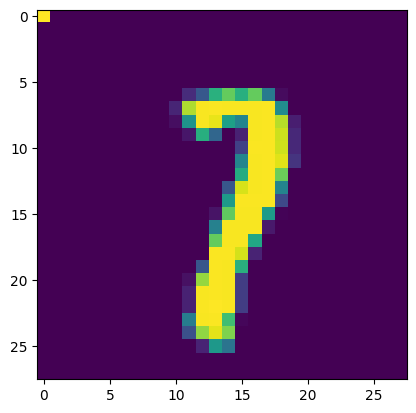

Real: 7
Predicted: 1
Rank of the correct answer: 2
Probabilities: [-0.06095986  0.5143025   0.08814031  0.1590751  -0.08852924 -0.00889261
 -0.03456228  0.22246396  0.02653207  0.18188165] 

Image no. 124


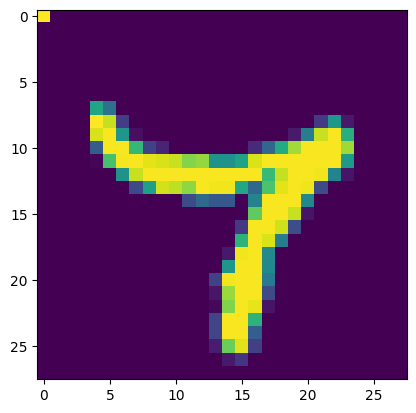

Real: 7
Predicted: 4
Rank of the correct answer: 2
Probabilities: [-0.22436789  0.01282715 -0.23940881  0.16857456  0.39178216 -0.07340312
  0.06746715  0.34362919  0.28259706  0.26134618] 

Image no. 149


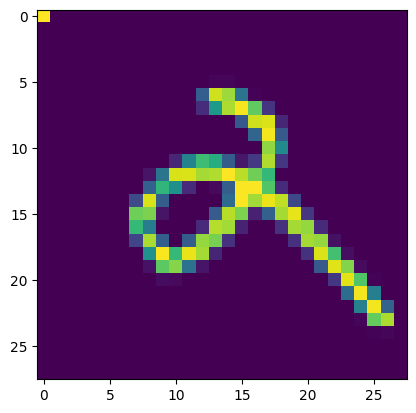

Real: 2
Predicted: 1
Rank of the correct answer: 4
Probabilities: [-0.0111568   0.28126207  0.10641649  0.03969564  0.2160721   0.06022148
  0.0407705  -0.14669125  0.09189347  0.2645282 ] 

Image no. 151


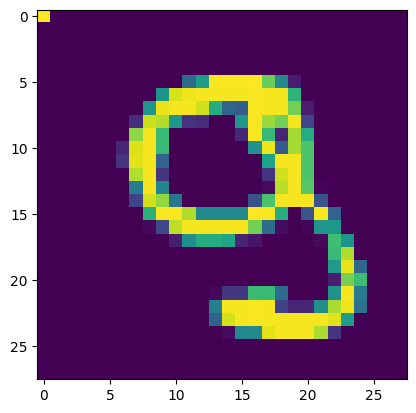

Real: 9
Predicted: 8
Rank of the correct answer: 2
Probabilities: [ 0.17002134  0.04507709  0.13135225  0.04662761  0.25670517 -0.07558405
 -0.20163979  0.09253013  0.28701599  0.26129581] 

Image no. 167


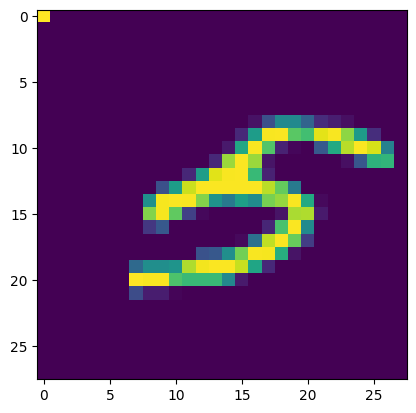

Real: 5
Predicted: 3
Rank of the correct answer: 2
Probabilities: [ 0.03427385  0.21219633  0.02997041  0.30069449  0.22432594  0.27756174
 -0.00835428 -0.01922911 -0.02191233 -0.0693879 ] 

Image no. 185


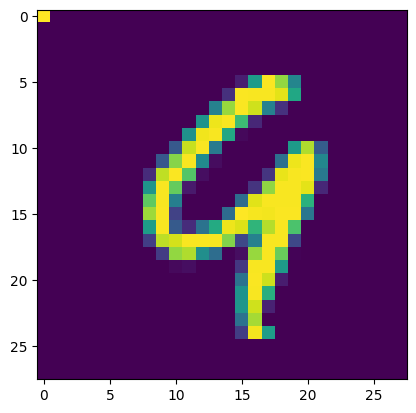

Real: 9
Predicted: 4
Rank of the correct answer: 2
Probabilities: [-0.0413675   0.03677351  0.05475376 -0.08926303  0.38930402 -0.13780339
  0.11223275  0.04453893  0.23607892  0.37312397] 

Image no. 187


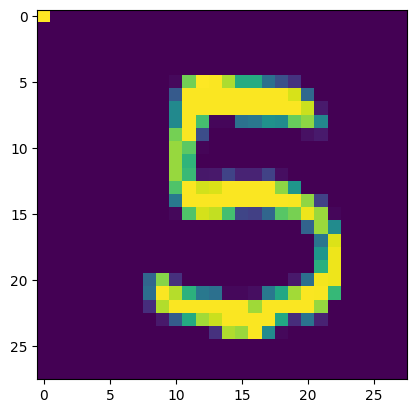

Real: 5
Predicted: 3
Rank of the correct answer: 2
Probabilities: [ 0.11593098 -0.04850202  0.12561719  0.38138632 -0.03836705  0.37031491
 -0.08079395 -0.2021284   0.153474    0.20077034] 

Image no. 195


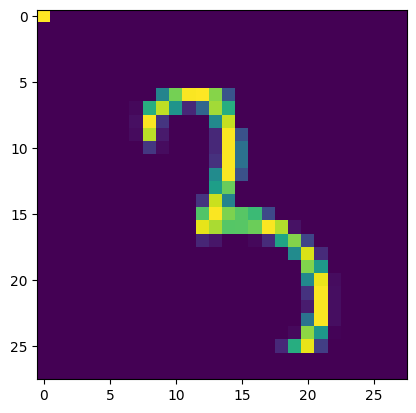

Real: 3
Predicted: 5
Rank of the correct answer: 3
Probabilities: [-0.1135495   0.00609094  0.07276341  0.13623621  0.07208642  0.22155757
  0.08592957  0.08461941  0.12107196  0.2183072 ] 



In [ ]:
def find_pos(item, lst):
    pos = [i for (z, i) in zip(lst, range(len(lst))) if item == z]
    return pos

def display_sample(sample: np.ndarray):

    sample = np.array(sample, dtype='float')
    pixels = np.zeros((28,28))

    for i in range(28):
        for j in range(28):
            pixels[i,j] = sample[i * 28 + j]

    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='viridis')
    plt.show()

yt_estimate = np.matmul(Xt,W)
for i in range(200):
    if yyt[i][np.argmax(yt_estimate[i,:])] != 1:
      print(f"Image no. {i}")
      display_sample(Xt[i])
      print(f"Real: {np.argmax(yyt[i,:])}")
      print(f"Predicted: {np.argmax(yt_estimate[i,:])}")
      value = yt_estimate[i,np.argmax(yyt[i,:])]
      v_sorted = np.sort(yt_estimate[i,:])
      value_index = find_pos(value,v_sorted)
      print(f"Rank of the correct answer: {10 - value_index[0]}")
      print(f"Probabilities: {yt_estimate[i,:]} \n")

<font color="green">
Atividade (e) <br>
Informe o que faz esta última célula executável do notebook e analise os resultados obtidos logo acima. <br>
</font>

**Resposta:**

A última célula do notebook executa um código que identifica e exibe amostras do conjunto de teste para as quais o modelo de classificação comete erros de previsão.

Para cada amostra, temos a imagem correspondente exibida, o que nos permite visualizar o dígito escrito à mão. A classe "Real", que são os rótulos de entrada, e a classe prevista ("*Predicted*") são mostradas, permitindo identificar onde o modelo comete erros. O classificador chega no resultado com base no vetor de probabilidades de acerto. O "*Rank of the correct answer*" mostra a posição da classe verdadeira entre as previsões ordenadas pelo modelo, o que permite analisar quais classes estão sendo mais confundidas.

Avaliando os resultados é possível notar que quando o classificador erra, na maioria das vezes a classe correta é a segunda de maior probabilidade. Percebemos também que os erros podem ter sido gerados pela baixa capacidade do classificador de generalizar os resultados e também o fato das amostras estarem mal posicionadas, cortadas ou com ruídos pode ter dificultado a classificação de imagens com distintas. Esses erros poderiam ser evitados  aumentando o a quantidade de treinamento.


